In [1]:
import time
start_time = time.time()
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
dataset=pd.read_csv("pakben.csv")
dataset=dataset.drop(['hash'],axis=1)
dataset['classification'] = dataset['classification'].replace(['malware','benign',],[1,0])
dataset.head()

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
1,1,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
2,2,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
3,3,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
4,4,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0


In [3]:
x = dataset.drop(columns=['classification']).values
y = dataset["classification"].values
x = StandardScaler().fit_transform(x)

In [4]:
svd = TruncatedSVD(n_components=5,n_iter=7)
hasil=svd.fit_transform(x)
data_hasil = pd.DataFrame(data = hasil
             , columns = ['component 1', 'component 2', 'component 3', 'component 4', 'component 5'])
data_final = pd.concat([data_hasil, dataset[['classification']]], axis = 1)

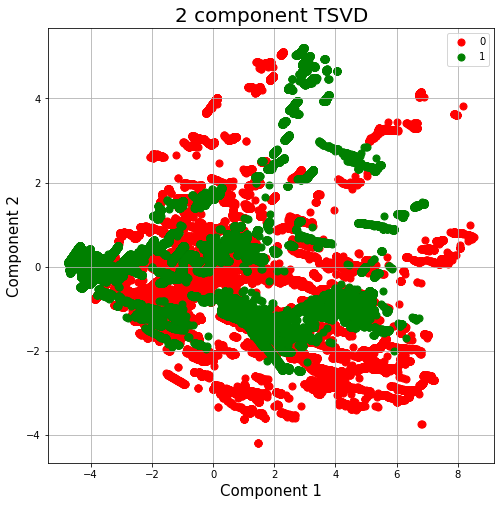

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component TSVD', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for classification, color in zip(targets,colors):
    indicesToKeep = data_final['classification'] == classification
    ax.scatter(data_final.loc[indicesToKeep, 'component 1']
               , data_final.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.savefig("Dimensional Reduction using TSVD.png", dpi=150)

In [6]:
print("Waktu proses reduksi dimensi : %s seconds" % (time.time() - start_time))

Waktu proses reduksi dimensi : 8.468790769577026 seconds


In [7]:
data_final

,component 1,component 2,component 3,component 4,component 5,classification
0,-1.758251,-0.386417,0.351616,-0.894982,-0.348520,1
1,-1.757862,-0.386009,0.352114,-0.894782,-0.347610,1
2,-1.757473,-0.385601,0.352612,-0.894582,-0.346701,1
3,-1.757084,-0.385193,0.353109,-0.894381,-0.345792,1
4,-1.756695,-0.384785,0.353607,-0.894181,-0.344883,1
...,...,...,...,...,...,...
99995,-4.023163,0.416120,-0.330705,-0.061523,0.713552,1
99996,-4.022775,0.416528,-0.330208,-0.061322,0.714462,1
99997,-4.022386,0.416936,-0.329710,-0.061122,0.715371,1
99998,-4.021997,0.417344,-0.329213,-0.060922,0.716280,1


In [8]:
x=data_final.iloc[:,0:5].values
y=data_final["classification"].values

In [9]:
x

array([[-1.75825053, -0.38641657,  0.3516164 , -0.89498214, -0.34851961],
       [-1.75786157, -0.38600856,  0.35211395, -0.89478185, -0.34761045],
       [-1.75747261, -0.38560054,  0.3526115 , -0.89458157, -0.34670129],
       ...,
       [-4.02238557,  0.41693644, -0.32971007, -0.06112212,  0.71537077],
       [-4.02199661,  0.41734446, -0.32921252, -0.06092184,  0.71627993],
       [-4.02160765,  0.41775247, -0.32871497, -0.06072155,  0.71718909]])

In [10]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=5,stratify=y)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Accuracy of logistic regression classifier on test set: 0.82197

[[12308  2692]
 [ 2649 12351]]

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     15000
           1       0.82      0.82      0.82     15000

    accuracy                           0.82     30000
   macro avg       0.82      0.82      0.82     30000
weighted avg       0.82      0.82      0.82     30000



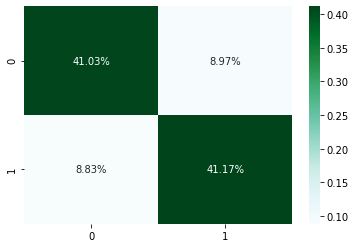

In [12]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))
print("")
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%',cmap='BuGn')
print("")
print(classification_report(y_test, y_pred))

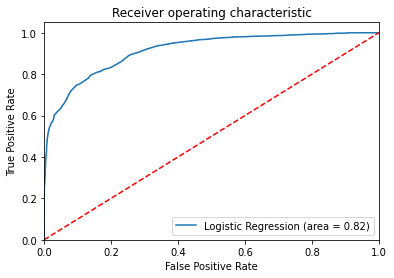

<Figure size 432x288 with 0 Axes>

In [13]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
plt.savefig("ROC Curve using TSVD.png", dpi=150)